### Calendar heatmap using july module

Reference:<br>
1. https://github.com/e-hulten/july

In [1]:
# Install module july. Upgrade module matplotlib to prevent deprecated warning.
#!pip install july
#!pip install matplotlib --upgrade

In [2]:
import pandas as pd
import july
from july.utils import date_range

In [3]:
# Read csv file contain list of public holiday
df = pd.read_csv('2022_my_ph.csv',parse_dates=['Date'])
df.head(3)

,Date,Note
0,2022-01-01,new year
1,2022-01-18,thaipusam
2,2022-02-01,cny day1


In [5]:
# Create list date range in year 2022
df1 = pd.date_range("2022-01-01","2022-12-31",freq='d')

# Create list date range in year 2022 ONLY for business day
df1b = pd.date_range("2022-01-01","2022-12-31",freq='B')

In [6]:
# Create list with value zero (0)
df2 = [0] * 365

In [7]:
# Create dataframe df3
df3 = pd.DataFrame(data = df2, index = df1, columns = ['value'])

In [8]:
# Encode the date according to public holiday listed at df
# Update value of df3 in which the df3 index = df['Date']
df3.iloc[df3.index.isin(df['Date'])] = 1

# Update value of df3 in which the df3 index is not same as df1b.
# All weekend, ie. Saturday and Sunday shall be given value '2'
df3.iloc[~df3.index.isin(df1b)] = 2

In [9]:
df3.head(3)

,value
2022-01-01,2
2022-01-02,2
2022-01-03,0


<AxesSubplot:>

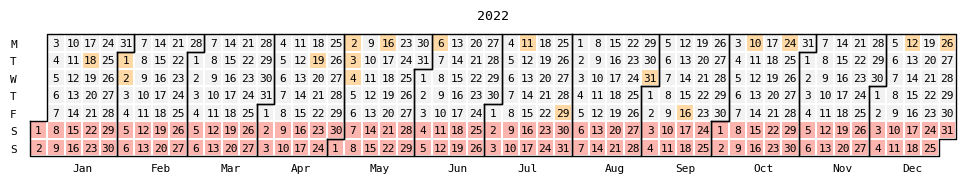

In [10]:
# More exhaustive example using useless, but pretty colours.
july.heatmap(dates=df3.index, 
             data=df3['value'], 
             cmap='Pastel1_r',
             month_grid=True, 
             horizontal=True,
             value_label=False,
             date_label=True,
             weekday_label=True,
             month_label=True, 
             year_label=True,
             colorbar=False,
             fontfamily="monospace",
             fontsize=8,
             title=None,
             titlesize='large',
             dpi=100)

array([[<AxesSubplot:title={'center':'January'}>,
        <AxesSubplot:title={'center':'February'}>,
        <AxesSubplot:title={'center':'March'}>,
        <AxesSubplot:title={'center':'April'}>],
       [<AxesSubplot:title={'center':'May'}>,
        <AxesSubplot:title={'center':'June'}>,
        <AxesSubplot:title={'center':'July'}>,
        <AxesSubplot:title={'center':'August'}>],
       [<AxesSubplot:title={'center':'September'}>,
        <AxesSubplot:title={'center':'October'}>,
        <AxesSubplot:title={'center':'November'}>,
        <AxesSubplot:title={'center':'December'}>]], dtype=object)

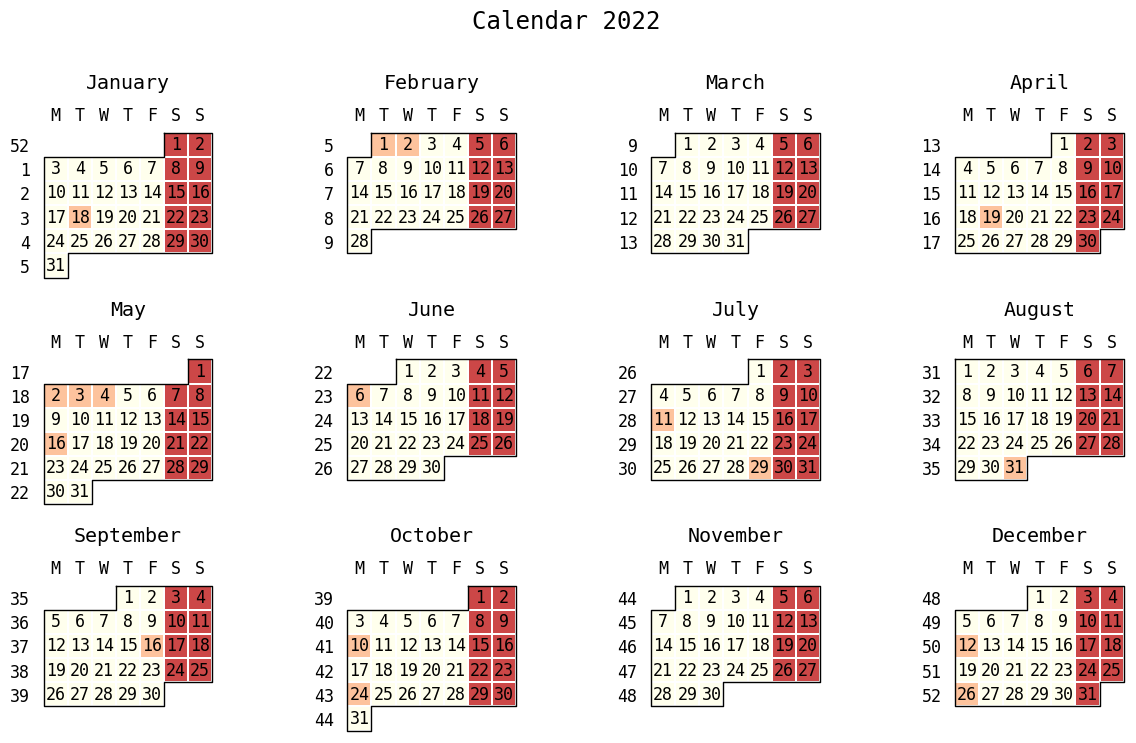

In [11]:
# Calendar plot. 
july.calendar_plot(df3.index, df3['value'],
                   cmap = 'july',
                   date_label = True,
                  figsize = None)